## Lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.manifold import TSNE
import matplotlib.cm as cm
import pickle

In [2]:
os.getcwd()

'/mnt/c/Users/ansel/AppData/Local/Programs/Microsoft VS Code'

In [3]:
os.chdir('/mnt/d/GitHub/WQU-Capstone/notebooks/classes')

os.getcwd()

'/mnt/d/GitHub/WQU-Capstone/notebooks/classes'

In [4]:
%load_ext autoreload
%aimport class_SeriesAnalyser, class_Trader, class_DataProcessor, class_ForecastingTrader
%autoreload 1

2025-05-21 07:03:20.217541: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-21 07:03:20.515927: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747811000.623321   26745 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747811000.658240   26745 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747811000.899135   26745 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [5]:
series_analyser = class_SeriesAnalyser.SeriesAnalyser()
trader = class_Trader.Trader()
data_processor = class_DataProcessor.DataProcessor()

In [6]:
path = '/mnt/d/GitHub/WQU-Capstone/notebooks/PCA_75etf'
index_dict = pd.read_pickle(f'{path}/etf_data_with_indicators.pkl')
index_dict

{'ARKK':                             adjClose    adjHigh     adjLow    adjOpen  \
 date                                                                    
 2018-01-02 00:00:00+00:00  36.133634  36.143000  34.885160  34.972263   
 2018-01-03 00:00:00+00:00  36.283489  36.576641  36.274123  36.480173   
 2018-01-04 00:00:00+00:00  36.405245  36.704954  36.039975  36.620661   
 2018-01-05 00:00:00+00:00  36.995297  36.995297  36.592563  36.770515   
 2018-01-08 00:00:00+00:00  36.742418  36.742418  35.890121  36.536368   
 ...                              ...        ...        ...        ...   
 2024-12-24 00:00:00+00:00  60.960000  60.990000  59.440000  59.630000   
 2024-12-26 00:00:00+00:00  60.960000  61.135000  60.040000  60.720000   
 2024-12-27 00:00:00+00:00  59.270000  60.600000  58.440000  60.540000   
 2024-12-30 00:00:00+00:00  57.610000  58.230000  56.900000  58.010000   
 2024-12-31 00:00:00+00:00  56.770000  58.170000  56.475000  58.040000   
 
                            

In [7]:
data = pd.DataFrame({
    ticker: df['adjClose']
    for ticker, df in index_dict.items()
})
data.index = data.index.tz_localize(None)
data.dropna(inplace=True)
data.to_excel(f'{path}/etf_close_prices.xlsx', index=True)
data

,ARKK,ARKQ,ARKW,CIBR,CQQQ,CWEB,DTEC,FDN,FTC,FTEC,...,TQQQ,USD,VGT,VV,XITK,XLK,XNTK,XSD,XSW,XT
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,36.133634,32.247813,41.379598,22.503973,61.906008,509.985282,24.845041,111.07,59.363983,47.459949,...,11.655315,5.208040,156.413246,109.756618,77.703023,60.083412,62.744553,69.745467,68.536574,33.627027
2018-01-03,36.283489,32.711363,41.806371,22.696397,62.279113,515.860900,24.992858,112.64,60.087699,47.984472,...,11.996567,5.338779,158.043136,110.458762,78.710931,60.584571,63.616921,70.800603,69.117810,33.898590
2018-01-04,36.405245,32.830835,41.797662,22.811852,62.868226,527.153103,25.129907,112.92,60.328938,48.256100,...,12.066895,5.354208,158.951753,110.920933,79.572751,60.890835,63.800192,71.303971,70.024144,34.029689
2018-01-05,36.995297,33.241818,42.398628,22.840715,63.329699,546.359030,25.295345,114.01,60.792116,48.724424,...,12.431324,5.394404,160.647214,111.631964,79.867868,61.531205,64.547936,71.536295,70.162064,34.310617
2018-01-08,36.742418,33.652801,42.546693,23.023518,63.712622,559.560809,25.520497,114.78,61.129850,48.996052,...,12.569583,5.498345,161.415323,111.880825,80.309072,61.763223,65.024440,72.165504,70.831963,34.348074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,60.960000,81.350000,115.110000,65.045671,40.530000,33.920000,46.404200,252.18,142.224654,191.377526,...,88.164953,70.551191,643.636476,275.989039,178.574800,240.116373,209.960519,257.480760,195.032110,61.090441
2024-12-26,60.960000,82.200000,114.480000,65.295654,40.950000,34.000000,46.690400,251.37,141.914753,191.747020,...,87.975544,70.860845,644.755062,276.068767,180.047500,240.276098,209.968415,259.578892,197.081502,61.150431
2024-12-27,59.270000,80.390000,111.680000,64.535705,40.660000,32.950000,46.157000,248.15,140.525196,188.831019,...,84.396708,68.663300,634.697774,273.118825,176.819500,237.081600,206.554046,255.972103,193.022707,60.670507


In [8]:
df_prices = pd.read_excel(f'{path}/etf_close_prices.xlsx', index_col=0)
df_prices

,ARKK,ARKQ,ARKW,CIBR,CQQQ,CWEB,DTEC,FDN,FTC,FTEC,...,TQQQ,USD,VGT,VV,XITK,XLK,XNTK,XSD,XSW,XT
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,36.133634,32.247813,41.379598,22.503973,61.906008,509.985282,24.845041,111.07,59.363983,47.459949,...,11.655315,5.208040,156.413246,109.756618,77.703023,60.083412,62.744553,69.745467,68.536574,33.627027
2018-01-03,36.283489,32.711363,41.806371,22.696397,62.279113,515.860900,24.992858,112.64,60.087699,47.984472,...,11.996567,5.338779,158.043136,110.458762,78.710931,60.584571,63.616921,70.800603,69.117810,33.898590
2018-01-04,36.405245,32.830835,41.797662,22.811852,62.868226,527.153103,25.129907,112.92,60.328938,48.256100,...,12.066895,5.354208,158.951753,110.920933,79.572751,60.890835,63.800192,71.303971,70.024144,34.029689
2018-01-05,36.995297,33.241818,42.398628,22.840715,63.329699,546.359030,25.295345,114.01,60.792116,48.724424,...,12.431324,5.394404,160.647214,111.631964,79.867868,61.531205,64.547936,71.536295,70.162064,34.310617
2018-01-08,36.742418,33.652801,42.546693,23.023518,63.712622,559.560809,25.520497,114.78,61.129850,48.996052,...,12.569583,5.498345,161.415323,111.880825,80.309072,61.763223,65.024440,72.165504,70.831963,34.348074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,60.960000,81.350000,115.110000,65.045671,40.530000,33.920000,46.404200,252.18,142.224654,191.377526,...,88.164953,70.551191,643.636476,275.989039,178.574800,240.116373,209.960519,257.480760,195.032110,61.090441
2024-12-26,60.960000,82.200000,114.480000,65.295654,40.950000,34.000000,46.690400,251.37,141.914753,191.747020,...,87.975544,70.860845,644.755062,276.068767,180.047500,240.276098,209.968415,259.578892,197.081502,61.150431
2024-12-27,59.270000,80.390000,111.680000,64.535705,40.660000,32.950000,46.157000,248.15,140.525196,188.831019,...,84.396708,68.663300,634.697774,273.118825,176.819500,237.081600,206.554046,255.972103,193.022707,60.670507


In [9]:
df_prices = df_prices.dropna(axis=0, how='any')
df_prices

,ARKK,ARKQ,ARKW,CIBR,CQQQ,CWEB,DTEC,FDN,FTC,FTEC,...,TQQQ,USD,VGT,VV,XITK,XLK,XNTK,XSD,XSW,XT
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,36.133634,32.247813,41.379598,22.503973,61.906008,509.985282,24.845041,111.07,59.363983,47.459949,...,11.655315,5.208040,156.413246,109.756618,77.703023,60.083412,62.744553,69.745467,68.536574,33.627027
2018-01-03,36.283489,32.711363,41.806371,22.696397,62.279113,515.860900,24.992858,112.64,60.087699,47.984472,...,11.996567,5.338779,158.043136,110.458762,78.710931,60.584571,63.616921,70.800603,69.117810,33.898590
2018-01-04,36.405245,32.830835,41.797662,22.811852,62.868226,527.153103,25.129907,112.92,60.328938,48.256100,...,12.066895,5.354208,158.951753,110.920933,79.572751,60.890835,63.800192,71.303971,70.024144,34.029689
2018-01-05,36.995297,33.241818,42.398628,22.840715,63.329699,546.359030,25.295345,114.01,60.792116,48.724424,...,12.431324,5.394404,160.647214,111.631964,79.867868,61.531205,64.547936,71.536295,70.162064,34.310617
2018-01-08,36.742418,33.652801,42.546693,23.023518,63.712622,559.560809,25.520497,114.78,61.129850,48.996052,...,12.569583,5.498345,161.415323,111.880825,80.309072,61.763223,65.024440,72.165504,70.831963,34.348074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,60.960000,81.350000,115.110000,65.045671,40.530000,33.920000,46.404200,252.18,142.224654,191.377526,...,88.164953,70.551191,643.636476,275.989039,178.574800,240.116373,209.960519,257.480760,195.032110,61.090441
2024-12-26,60.960000,82.200000,114.480000,65.295654,40.950000,34.000000,46.690400,251.37,141.914753,191.747020,...,87.975544,70.860845,644.755062,276.068767,180.047500,240.276098,209.968415,259.578892,197.081502,61.150431
2024-12-27,59.270000,80.390000,111.680000,64.535705,40.660000,32.950000,46.157000,248.15,140.525196,188.831019,...,84.396708,68.663300,634.697774,273.118825,176.819500,237.081600,206.554046,255.972103,193.022707,60.670507


In [10]:
# split data in training and test
df_prices_train, df_prices_test = data_processor.split_data(df_prices,
                                                            ('01-01-2018',
                                                             '31-12-2023'),
                                                            ('01-01-2024',
                                                             '31-12-2024'),
                                                            remove_nan=True)
train_val_split = '01-01-2023'

Total of 75 tickers
Total of 75 tickers after removing tickers with Nan values


In [11]:
df_prices_train

,ARKK,ARKQ,ARKW,CIBR,CQQQ,CWEB,DTEC,FDN,FTC,FTEC,...,TQQQ,USD,VGT,VV,XITK,XLK,XNTK,XSD,XSW,XT
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,36.133634,32.247813,41.379598,22.503973,61.906008,509.985282,24.845041,111.07,59.363983,47.459949,...,11.655315,5.208040,156.413246,109.756618,77.703023,60.083412,62.744553,69.745467,68.536574,33.627027
2018-01-03,36.283489,32.711363,41.806371,22.696397,62.279113,515.860900,24.992858,112.64,60.087699,47.984472,...,11.996567,5.338779,158.043136,110.458762,78.710931,60.584571,63.616921,70.800603,69.117810,33.898590
2018-01-04,36.405245,32.830835,41.797662,22.811852,62.868226,527.153103,25.129907,112.92,60.328938,48.256100,...,12.066895,5.354208,158.951753,110.920933,79.572751,60.890835,63.800192,71.303971,70.024144,34.029689
2018-01-05,36.995297,33.241818,42.398628,22.840715,63.329699,546.359030,25.295345,114.01,60.792116,48.724424,...,12.431324,5.394404,160.647214,111.631964,79.867868,61.531205,64.547936,71.536295,70.162064,34.310617
2018-01-08,36.742418,33.652801,42.546693,23.023518,63.712622,559.560809,25.520497,114.78,61.129850,48.996052,...,12.569583,5.498345,161.415323,111.880825,80.309072,61.763223,65.024440,72.165504,70.831963,34.348074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,53.010000,57.840000,76.470000,53.853912,34.535629,29.166545,41.008946,187.70,109.049714,142.581283,...,49.509907,26.570021,479.861759,214.199607,146.964600,190.410512,162.694938,224.973598,151.698506,59.087093
2023-12-26,53.790000,58.820000,77.200000,54.123082,34.505711,29.539984,41.481144,188.13,109.528002,143.256741,...,50.414557,27.358390,482.233235,215.114443,148.610000,191.203683,164.063642,228.612819,152.992223,59.633552
2023-12-27,54.260000,58.840000,78.290000,53.993481,34.405983,29.501683,41.426786,188.10,109.647574,143.346140,...,50.680052,27.428245,482.699592,215.458736,148.690000,191.193768,164.445474,228.383498,153.602077,59.802457


## Clustering using PCA on returns

In [12]:
df_returns = data_processor.get_return_series(df_prices_train)
df_returns

,ARKK,ARKQ,ARKW,CIBR,CQQQ,CWEB,DTEC,FDN,FTC,FTEC,...,TQQQ,USD,VGT,VV,XITK,XLK,XNTK,XSD,XSW,XT
date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.004147,0.014375,0.010314,0.008551,0.006027,0.011521,0.005950,0.014135,0.012191,0.011052,...,0.029279,0.025103,0.010420,0.006397,0.012971,0.008341,0.013903,0.015128,0.008481,0.008076
2018-01-04,0.003356,0.003652,-0.000208,0.005087,0.009459,0.021890,0.005484,0.002486,0.004015,0.005661,...,0.005862,0.002890,0.005749,0.004184,0.010949,0.005055,0.002881,0.007110,0.013113,0.003867
2018-01-05,0.016208,0.012518,0.014378,0.001265,0.007340,0.036433,0.006583,0.009653,0.007678,0.009705,...,0.030201,0.007507,0.010667,0.006410,0.003709,0.010517,0.011720,0.003258,0.001970,0.008255
2018-01-08,-0.006835,0.012363,0.003492,0.008003,0.006047,0.024163,0.008901,0.006754,0.005556,0.005575,...,0.011122,0.019268,0.004781,0.002229,0.005524,0.003771,0.007382,0.008796,0.009548,0.001092
2018-01-09,0.002039,0.002556,-0.002661,-0.003343,0.004161,0.000328,-0.000767,-0.002527,0.003631,-0.003059,...,0.000763,-0.024590,-0.002553,0.002304,-0.003663,-0.002554,-0.004622,-0.012072,-0.000556,0.002181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.013382,0.006438,0.008440,0.004185,-0.032141,-0.082254,0.001956,0.000426,0.005951,0.001535,...,0.004088,0.002259,0.000973,0.002209,0.002370,0.001303,0.000279,0.005526,0.010002,0.004561
2023-12-26,0.014714,0.016943,0.009546,0.004998,-0.000866,0.012804,0.011515,0.002291,0.004386,0.004737,...,0.018272,0.029671,0.004942,0.004271,0.011196,0.004166,0.008413,0.016176,0.008528,0.009248
2023-12-27,0.008738,0.000340,0.014119,-0.002395,-0.002890,-0.001297,-0.001310,-0.000159,0.001092,0.000624,...,0.005266,0.002553,0.000967,0.001601,0.000538,-0.000052,0.002327,-0.001003,0.003986,0.002832


In [13]:
print('Total number of possible pairs: ', len(df_returns.columns)*(len(df_returns.columns)-1)/2)

Total number of possible pairs:  2775.0


### Applying PCA on Returns

In [14]:
N_PRIN_COMPONENTS = 5
X, explained_variance = series_analyser.apply_PCA(N_PRIN_COMPONENTS, df_returns, 
                                                  random_state=0)#12)
print(explained_variance)

[0.03490842 0.00403744 0.00154262 0.00080733 0.0006613 ]


### Clustering

In [15]:
def cluster_size(counts):
    plt.figure()
    plt.barh(counts.index+1, counts.values)
    #plt.title('Cluster Member Counts')
    plt.yticks(np.arange(1, len(counts)+1, 1))
    plt.xlabel('ETFs within cluster', size=12)
    plt.ylabel('Cluster Id', size=12);

In [16]:
clustered_series_all, clustered_series, counts, clf = series_analyser.apply_DBSCAN(0.15,
                                                                                   3,
                                                                                   X,
                                                                                   df_returns)

Clusters discovered: 0
Pairs to evaluate: 0


In [17]:
# optics
clustered_series_all, clustered_series, counts, clf = series_analyser.apply_OPTICS(X, df_returns, min_samples=3,
                                                                                   #max_eps=5, 
                                                                                   cluster_method='xi')

OPTICS(max_eps=2, metric='euclidean', min_samples=3)
Clusters discovered: 6
Pairs to evaluate: 74


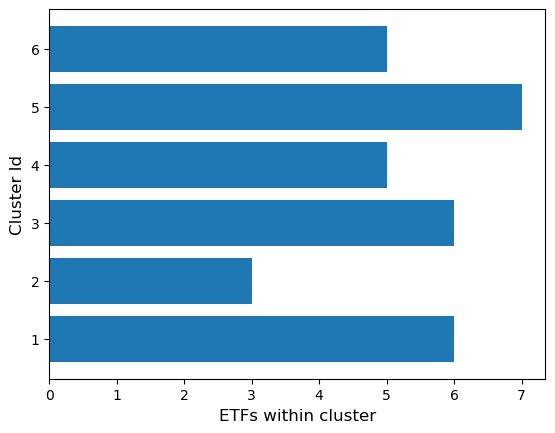

In [18]:
cluster_size(counts)

In [19]:
print(counts)
print('Average cluster size: ', np.mean(counts))

4    7
0    6
2    6
5    5
3    5
1    3
Name: count, dtype: int64
Average cluster size:  5.333333333333333


**Fundamental analysis for clusters**

In [20]:
etfs, etfs_unique, tickers = \
            data_processor.read_ticker_excel(path=f'{path}/tech_etfs.xlsx')

In [21]:
for label_n in range(len(counts)):
    elements_cluster_n = list(clustered_series[clustered_series == label_n].index)
    etfs_cluster_n = etfs_unique[etfs_unique['Ticker'].isin(elements_cluster_n)]
    print('\nCluster {}:\n{}'.format(label_n, etfs_cluster_n[['Ticker', 'Segment']]))


Cluster 0:
   Ticker     Segment
3    CIBR  Technology
7     FDN  Technology
16   HACK  Technology
22    IGV  Technology
40   PNQI      Growth
53   SKYY  Technology

Cluster 1:
   Ticker           Segment
6    DTEC        Technology
25   ISRA  Emerging Markets
35   NUMG           Mid Cap

Cluster 2:
   Ticker    Segment
32   LRGE  Large Cap
33   MTUM  Large Cap
34   NULG  Large Cap
37   ONEQ  Large Cap
45   QQEW  Large Cap
47   QQQE  Large Cap

Cluster 3:
   Ticker            Segment
9    FTEC         Technology
21    IGM         Technology
28    IYW         Technology
46    QQQ          Large Cap
67    VGT  Developed Markets

Cluster 4:
   Ticker            Segment
17   IDLV  Developed Markets
18   IDMO  Developed Markets
20   IEFA  Developed Markets
38    PIN   Emerging Markets
39    PIZ  Developed Markets
63   TLTD  Developed Markets
64   TLTE   Emerging Markets

Cluster 5:
   Ticker     Segment
10   FTXL         NaN
43    PSI  Technology
54    SMH  Technology
58   SOXX  Technology

### Visualizing with t-sne

In [22]:
def plot_TSNE(X, clf, clustered_series_all):
    """
    This function makes use of t-sne to visualize clusters in 2d.
    """
    
    X_tsne = TSNE(learning_rate=1000, perplexity=25, random_state=1337).fit_transform(X)
    
    # visualization
    fig = plt.figure(1, facecolor='white', figsize=(15,15), frameon=True, edgecolor='black')
    plt.clf()
    
    # axis in the middle
    ax = fig.add_subplot(1, 1, 1, alpha=0.9)
    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('center')
    ax.spines['left'].set_alpha(0.3)
    ax.spines['bottom'].set_position('center')
    ax.spines['bottom'].set_alpha(0.3)
    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params(which='major', labelsize=18)
    #plt.axis('off')

    # etfs in cluster
    labels = clf.labels_
    x = X_tsne[(labels!=-1), 0]
    y = X_tsne[(labels!=-1), 1]
    tickers = list(clustered_series_all[clustered_series_all != -1].index)
    plt.scatter(
        x,
        y,
        s=300,
        alpha=0.75,
        c=labels[labels!=-1],
        cmap=cm.Paired
    )
    for i, ticker in enumerate(tickers):
        plt.annotate(ticker, (x[i]-20, y[i]+12), size=15)

    # remaining etfs, not clustered
    x = X_tsne[(clustered_series_all==-1).values, 0]
    y = X_tsne[(clustered_series_all==-1).values, 1]
    tickers = list(clustered_series_all[clustered_series_all == -1].index)

    # WARNING: elimintate outliers
    #outliers = ['DTO','SCO']
    outliers = ['DZZ', 'XME']
    to_remove_x = [x[clustered_series_all[clustered_series_all==-1].index.get_loc(outliers[0])],
                   x[clustered_series_all[clustered_series_all==-1].index.get_loc(outliers[1])]]
    to_remove_y = [y[clustered_series_all[clustered_series_all==-1].index.get_loc(outliers[0])],
                   y[clustered_series_all[clustered_series_all==-1].index.get_loc(outliers[1])]]
    x = np.array([i for i in x if i not in to_remove_x])
    y= np.array([i for i in y if i not in to_remove_y])

    plt.scatter(
        x,
        y,
        s=150,
        alpha=0.20,
        c='black'
    )
    #for i, ticker in enumerate(tickers):
    #    plt.annotate(ticker, (x[i]+20, y[i]+20))#, arrowprops={'arrowstyle':'simple'})
        
    #plt.title('OPTICS clusters visualized with t-SNE', size=16);
    plt.xlabel('t-SNE Dim. 1', position=(0.92,0), size=20)
    plt.ylabel('t-SNE Dim. 2', position=(0,0.92), size=20)
    ax.set_xticks(range(-300, 301, 600))
    ax.set_yticks(range(-300, 301, 600))
    #plt.savefig('DBSCAN_2014_2018_eps0_15.png', bbox_inches='tight', pad_inches=0.01)
    plt.savefig('OPTICS_2013_2017.png', bbox_inches='tight', pad_inches=0.1)
    plt.show()
    # include connections - see quontopian

KeyError: 'DZZ'

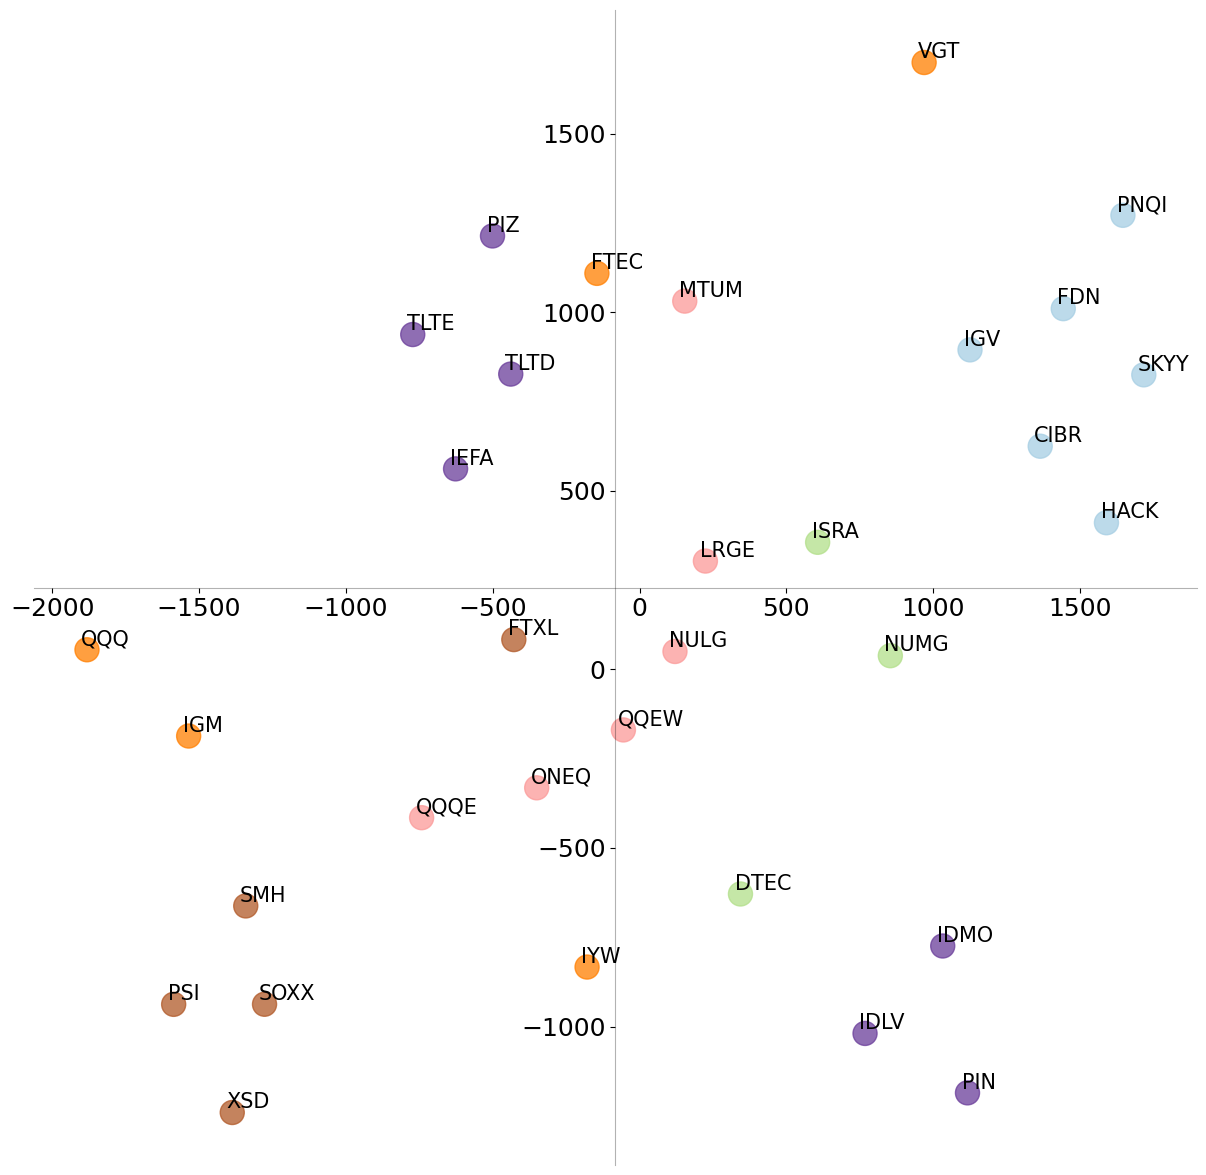

In [23]:
plot_TSNE(X,clf, clustered_series_all)

In [24]:
plt.rcParams.update({'font.size': 12})

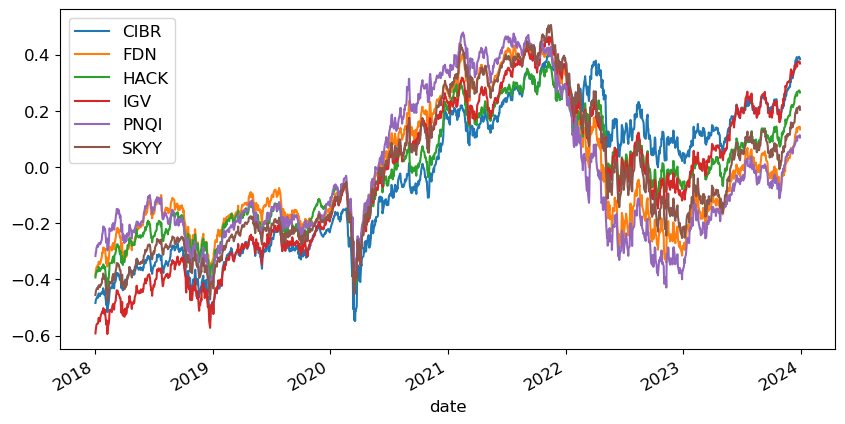

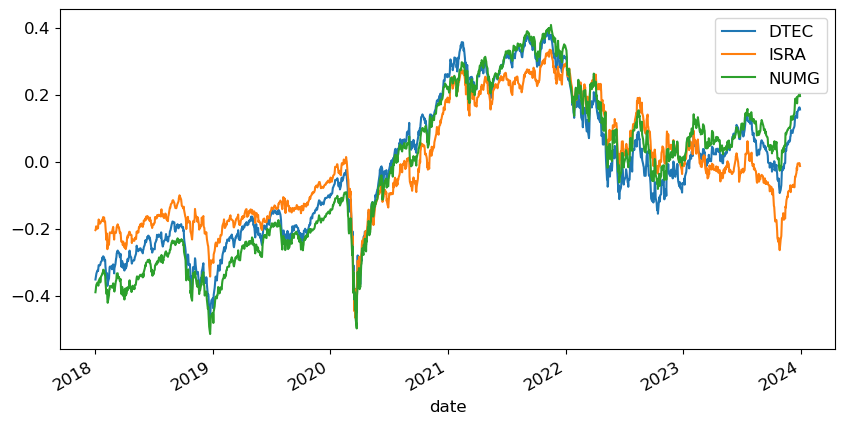

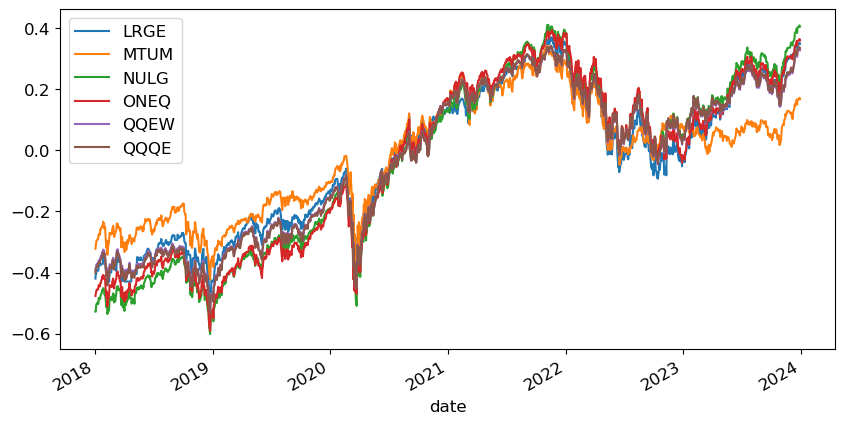

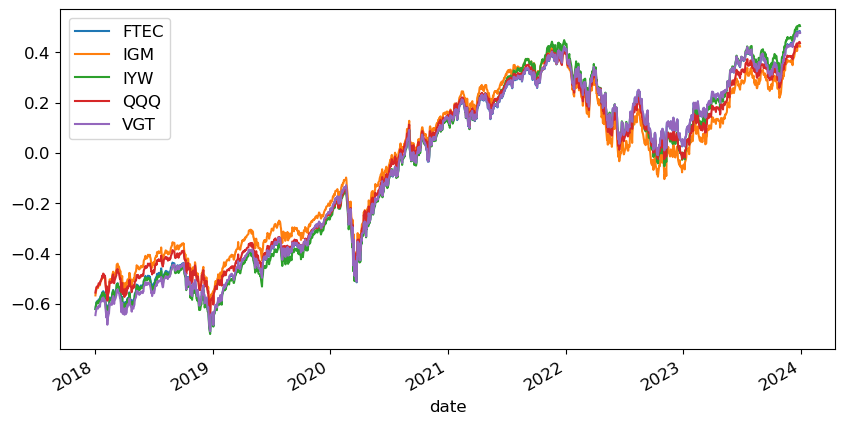

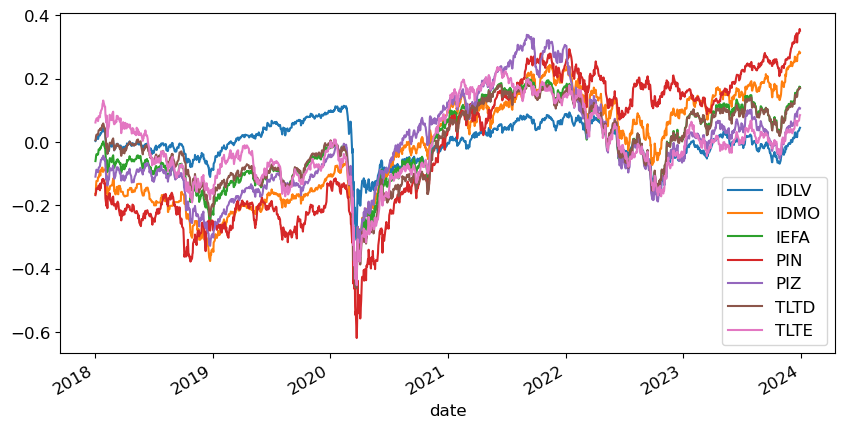

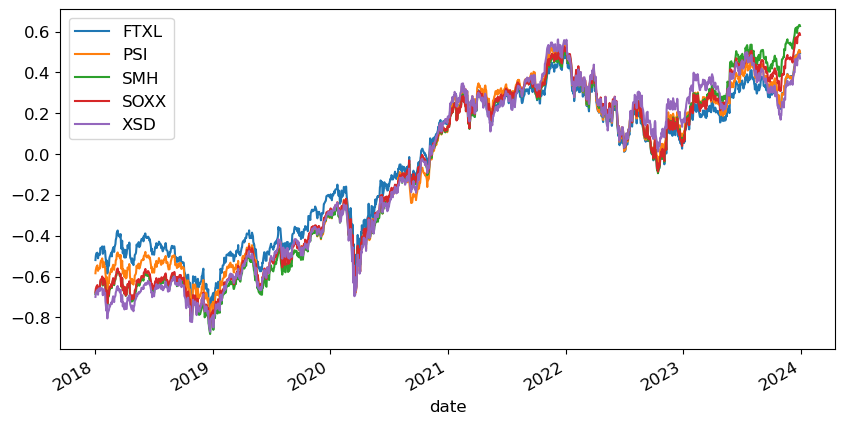

In [25]:
for clust in range(len(counts)):
    symbols = list(clustered_series[clustered_series==clust].index)
    means = np.log(df_prices_train[symbols].mean())
    series = np.log(df_prices_train[symbols]).sub(means)
    series.plot(figsize=(10,5))#title='ETFs Time Series for Cluster %d' % (clust+1))
    #plt.ylabel('Normalized log prices', size=12)
    #plt.xlabel('Date', size=12)
    plt.savefig('cluster_{}.png'.format(str(clust+1)), bbox_inches='tight', pad_inches=0.1)

In [26]:
subsample = 2500
min_half_life = 21 # avg. number of points in a month
max_half_life = 252 # avg. number of points in a year

In [27]:
clustered_series.to_csv(f'{path}/pca_cluster_Index_data.csv')
clustered_series

CIBR    0
DTEC    1
FDN     0
FTEC    3
FTXL    5
HACK    0
IDLV    4
IDMO    4
IEFA    4
IGM     3
IGV     0
ISRA    1
IYW     3
LRGE    2
MTUM    2
NULG    2
NUMG    1
ONEQ    2
PIN     4
PIZ     4
PNQI    0
PSI     5
QQEW    2
QQQ     3
QQQE    2
SKYY    0
SMH     5
SOXX    5
TLTD    4
TLTE    4
VGT     3
XSD     5
dtype: int64

In [28]:
pairs_unsupervised, unique_tickers = series_analyser.get_candidate_pairs(clustered_series=clustered_series,
                                                            pricing_df_train=df_prices_train,
                                                            pricing_df_test=df_prices_test,
                                                            min_half_life=min_half_life,
                                                            max_half_life=max_half_life,
                                                            min_zero_crosings=12,
                                                            p_value_threshold=0.10,
                                                            hurst_threshold=0.5,
                                                            subsample=subsample
                                                            )

Cluster 6/6Found 9 pairs
The pairs contain 12 unique tickers
Pairs Selection failed stage:  {'cointegration': 63, 'None': 9, 'hurst_exponent': 2}


### Saving pairs

In [29]:
with open(f'{path}/PCA_selected_pairs.pickle', 'wb') as f:
    pickle.dump(pairs_unsupervised, f)

In [30]:
pairs_unsupervised

[('HACK',
  'IGV',
  {'t_statistic': np.float64(-3.5170995727748),
   'critical_val': {'1%': np.float64(-3.4347053829922043),
    '5%': np.float64(-2.863463625572207),
    '10%': np.float64(-2.5677941141530387)},
   'p_value': np.float64(0.007558648413183355),
   'coint_coef': np.float64(0.5864554784165825),
   'zero_cross': 60,
   'half_life': 59,
   'hurst_exponent': np.float64(0.39779962155108334),
   'spread': date
   2018-01-02    13.022929
   2018-01-03    13.112383
   2018-01-04    13.114826
   2018-01-05    13.012505
   2018-01-08    13.189201
                   ...    
   2023-12-22    12.643218
   2023-12-26    12.849719
   2023-12-27    12.770009
   2023-12-28    12.716532
   2023-12-29    12.743643
   Length: 1508, dtype: float64,
   'Y_train': date
   2018-01-02    31.207857
   2018-01-03    31.518383
   2018-01-04    31.663942
   2018-01-05    31.751277
   2018-01-08    32.032691
                   ...    
   2023-12-22    60.438166
   2023-12-26    60.797146
   2023-12-2